<a href="https://colab.research.google.com/github/kasbah9/ProjetVT/blob/main/ProjetECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
Mounted at /content/drive
Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9279 - loss: 0.2579 - val_accuracy: 0.9780 - val_loss: 0.1395
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.1381 - val_accuracy: 0.9780 - val_loss: 0.1273
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9871 - loss: 0.1561 - val_accuracy: 0.9808 - val_loss: 0.1136
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0903 - val_accuracy: 0.9808 - val_loss: 0.0990
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0732 - val_accuracy: 0.9780 - val_loss: 0.0975
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.0710 - val_accuracy: 0.9808 - val_loss: 0.0981
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0595 - val_accuracy: 0.9808 - val_loss: 0.0853
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0541 - val_accuracy: 0.9835 - val_loss: 0.0813
Epo

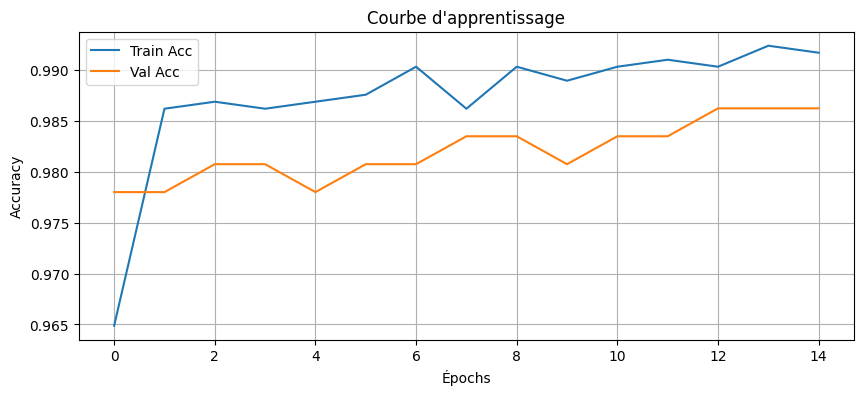

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9897 - loss: 0.0382 

Accuracy sur test : 0.99
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       448
           1       1.00      0.57      0.73         7

    accuracy                           0.99       455
   macro avg       1.00      0.79      0.86       455
weighted avg       0.99      0.99      0.99       455

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

📊 Résumé des prédictions pour 111 :
Normaux : 2009, Anormaux : 123, Total : 2132


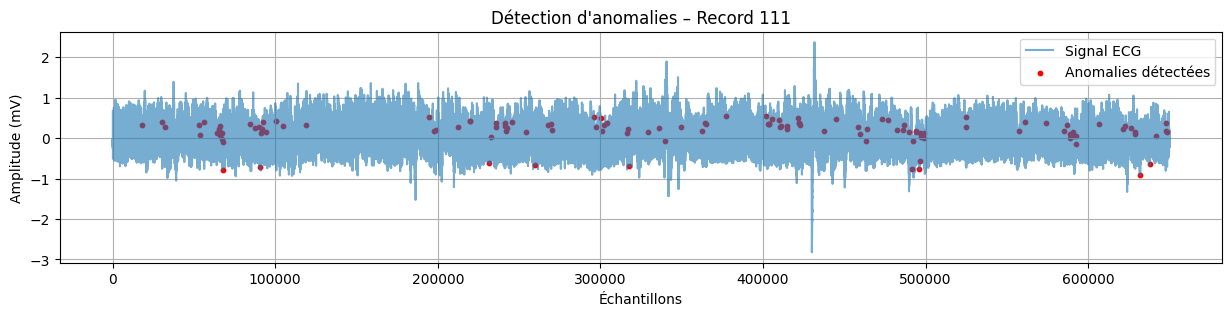

In [ ]:
# ECG Anomaly Detection - Google Colab Notebook (Amélioré avec les modules dédiés)

# --- Installation des bibliothèques nécessaires
!pip install wfdb
import wfdb
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from collections import Counter

# --- Montage Google Drive (si besoin)
from google.colab import drive
drive.mount('/content/drive')

# --- Téléchargement des données si non présentes
import wfdb
wfdb.dl_database('mitdb', dl_dir='mitdb')

# --- Chargement d’un enregistrement et extraction des fenêtres
record_name = '100'
record = wfdb.rdrecord(os.path.join('mitdb', record_name))
annotation = wfdb.rdann(os.path.join('mitdb', record_name), 'atr')

window_size = 200
half_window = window_size // 2
signal = record.p_signal[:, 0]

X, y = [], []
for i, pos in enumerate(annotation.sample):
    if pos - half_window < 0 or pos + half_window > len(signal):
        continue
    beat = signal[pos - half_window : pos + half_window]
    label = 0 if annotation.symbol[i] == 'N' else 1
    X.append(beat)
    y.append(label)

X = np.array(X)
y = np.array(y)
print(f"{len(X)} fenêtres extraites. Répartition : {Counter(y)}")

# --- Normalisation et split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# --- Modèle simple (MLP)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# --- Courbe d'apprentissage
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Courbe d'apprentissage")
plt.xlabel("Épochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# --- Évaluation finale
loss, acc = model.evaluate(X_test, y_test)
print(f"\nAccuracy sur test : {acc:.2f}")
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# --- Fonction de prédiction et visualisation (issue de analyse_record.py)
def predict_ecg(record_name, model, scaler, data_dir='mitdb', window_size=200):
    record = wfdb.rdrecord(os.path.join(data_dir, record_name))
    annotation = wfdb.rdann(os.path.join(data_dir, record_name), 'atr')
    signal = record.p_signal[:, 0]
    half_window = window_size // 2

    X_pred, labels, positions = [], [], []
    for i, pos in enumerate(annotation.sample):
        if pos - half_window < 0 or pos + half_window > len(signal):
            continue
        beat = signal[pos - half_window : pos + half_window]
        label = 0 if annotation.symbol[i] == 'N' else 1
        X_pred.append(beat)
        labels.append(label)
        positions.append(pos)

    X_pred = np.array(X_pred)
    X_scaled = scaler.transform(X_pred)
    y_hat = (model.predict(X_scaled) > 0.5).astype(int).flatten()

    count = Counter(y_hat)
    print(f"\n📊 Résumé des prédictions pour {record_name} :")
    print(f"Normaux : {count[0]}, Anormaux : {count[1]}, Total : {len(y_hat)}")

    # Visualisation
    plt.figure(figsize=(15, 3))
    plt.plot(signal, alpha=0.6, label='Signal ECG')
    anomaly_positions = [positions[i] for i, pred in enumerate(y_hat) if pred == 1]
    plt.scatter(anomaly_positions, [signal[p] for p in anomaly_positions], color='red', s=10, label='Anomalies détectées')
    plt.title(f"Détection d'anomalies – Record {record_name}")
    plt.xlabel("Échantillons")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
    plt.grid()
    plt.show()

# --- Exécution sur un autre enregistrement (modifiable ici)
predict_ecg('111', model, scaler)
